In [1]:
import pandas as pd
import numpy as np

#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']="Simsun"
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [2]:
# 从scikit-learn库中导入iris样本数据集
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#显示前4条数据
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


## 数据可视化

可使用DataFrame的**hist**,**boxplot**,**plot**,**plot.scatter**,**bar**，**plot.pie**,**plot.density**等方法直接绘制数据的可视化图形。

### 直方图

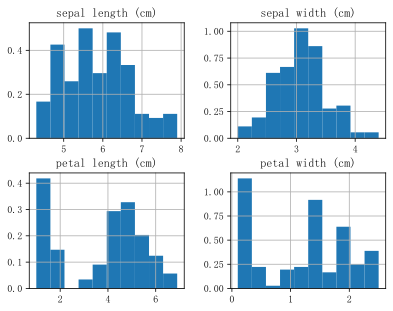

In [4]:
# 直方图
df.hist(density=True)
plt.show()

### 箱型图

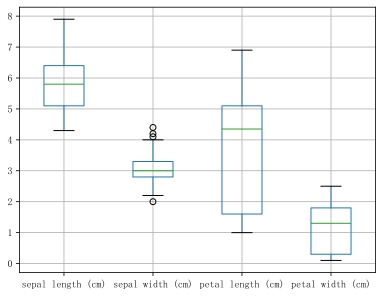

In [10]:
## 绘制箱型图
df.boxplot()
plt.show()

### 条形图

In [12]:
#数据准备
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

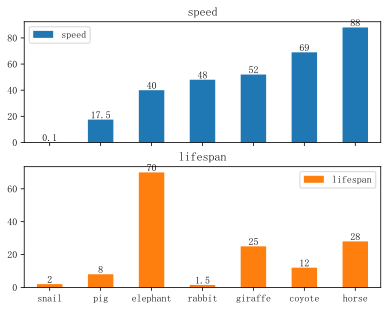

In [13]:
# 每列一个条形图
axis = df.plot.bar(rot=0, subplots=True)
for ax in axis:
    ax.bar_label(ax.containers[0])
plt.show()

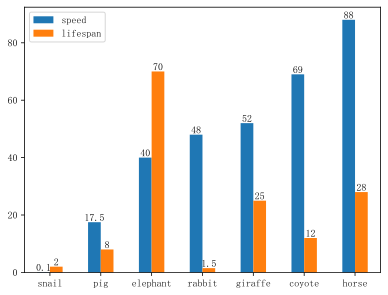

In [14]:
# 所有列在一张图上
ax = df.plot.bar(rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

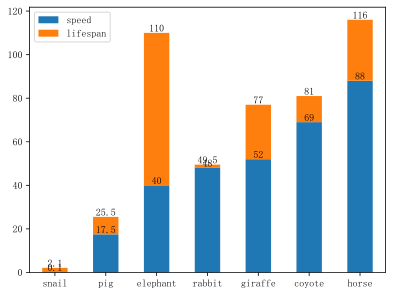

In [15]:
# 堆积条形图
ax = df.plot.bar(rot=0,stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### 水平条形图

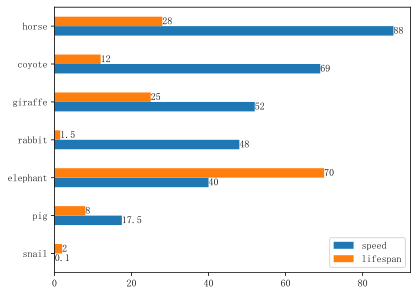

In [7]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.barh(rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# 相关分析

## 关系统计量
除了**describe**外, DataFrame还可以计算两两列之间的统计关系：
 * **corr**计算相关系数
 * **cov**计算协方差

In [8]:
# 从scikit-learn库中导入iris样本数据集
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 计算相关系数
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 可视化分析

用**scatter_matrix**函数可以绘制两两列之间的散点图，直观的展示列和列之间的相关关系

In [9]:
from pandas.plotting import scatter_matrix

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#两两绘制散点图
scatter_matrix(df, alpha=0.7, figsize=(5, 5), diagonal="density");

# 自相关分析

对时间序列数据，需要了解变量是否存在自相关性。本例中使用的例子是8个国家货币的汇率数据，从1996到2005.

In [10]:
df=pd.read_csv("exchange_rate.csv")
df.head()

,Australia,British,Canada,Switzerland,China,Japan,New Zealand,Singapore
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


## 自相关统计量

Series对象的**autocorr**方法可以计算指定期数的**自相关系数**。

In [11]:
df["China"].autocorr()

0.9980886171348745

## 可视化分析


### 自相关系数图

**autocorrelation_plot**可以Series的自相关系数图。

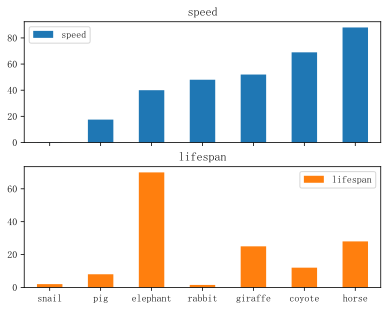

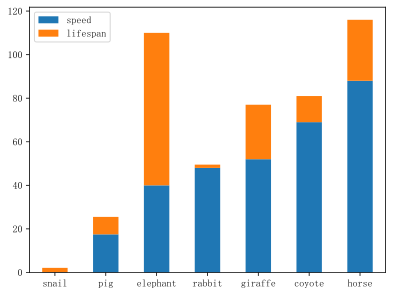

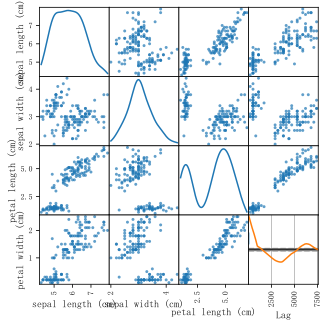

In [12]:
# 自相关系数图
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["China"]);
plt.show()

### 迟滞散点图

**lag_plot**绘制Series和迟滞(lag)指定期数后的散点图

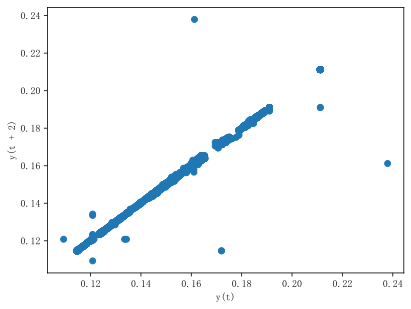

In [13]:
from pandas.plotting import lag_plot
lag_plot(df["China"],lag=2)
plt.show()